# Prg 1

<Figure size 1200x800 with 0 Axes>

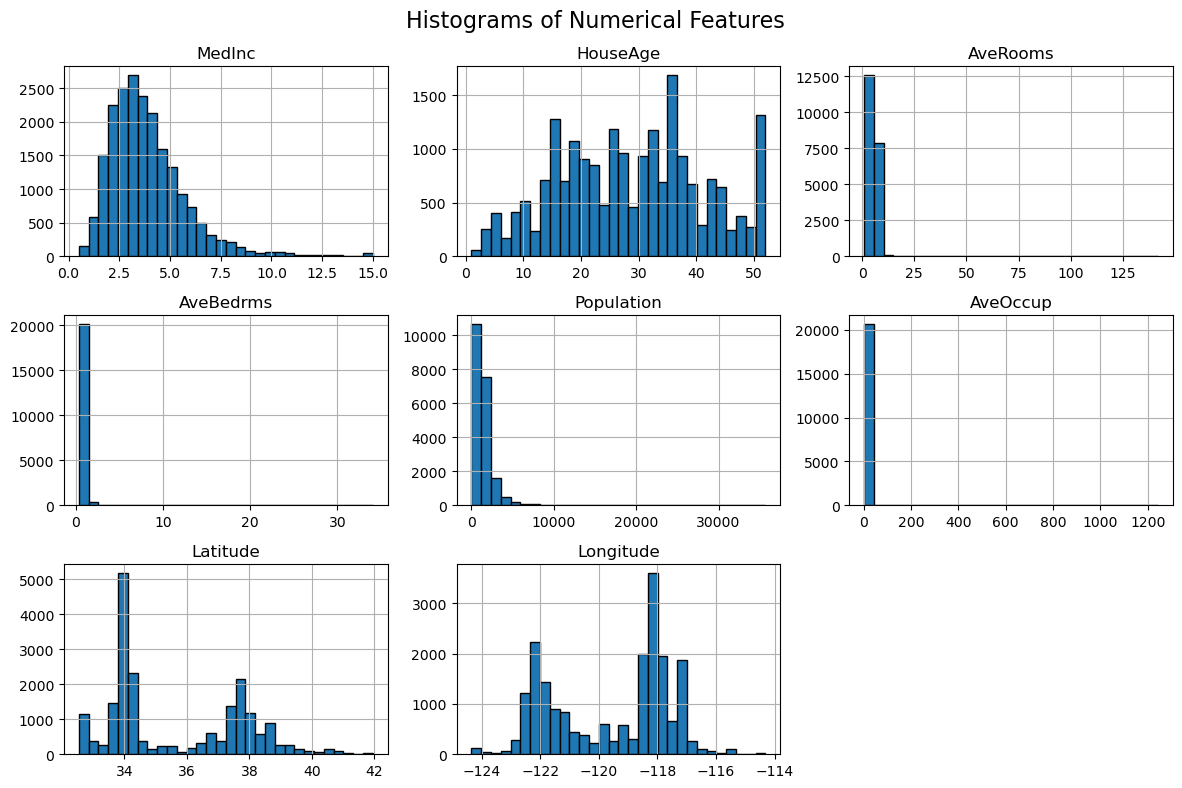

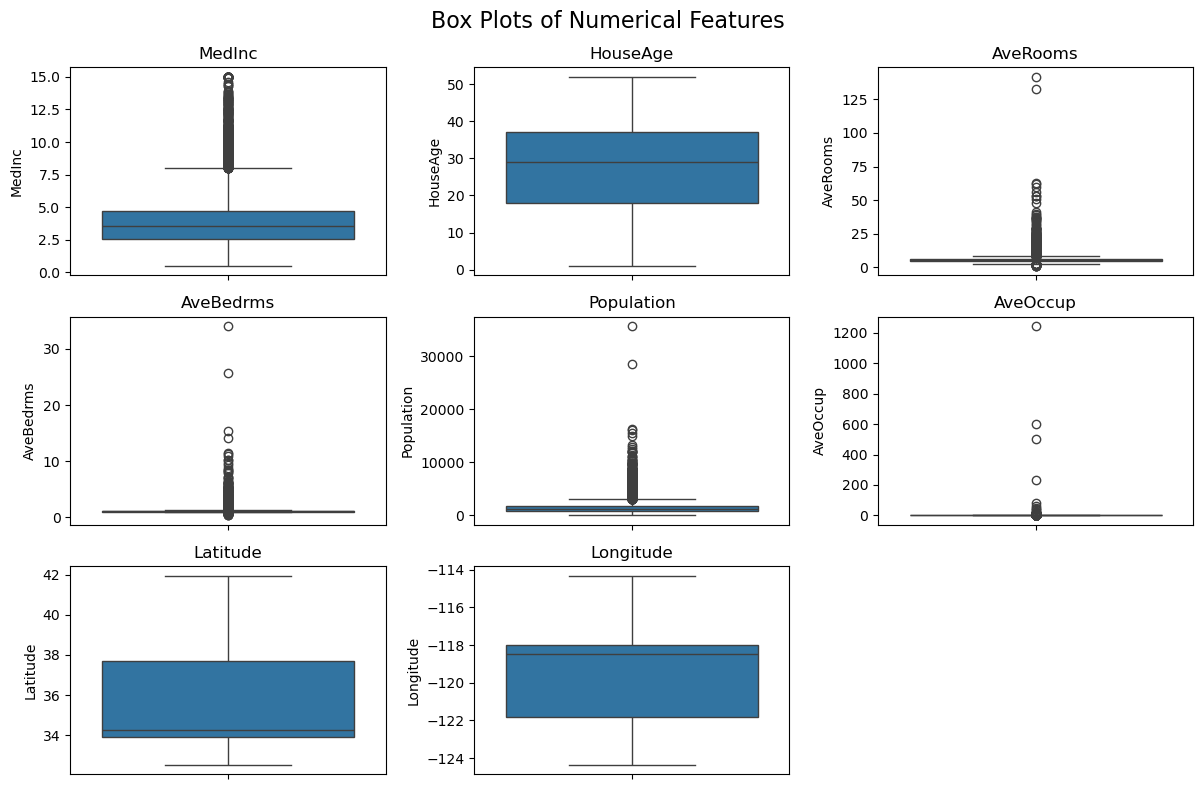

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
# Create histograms for all numerical features
plt.figure(figsize=(12, 8))
df.hist(bins=30, figsize=(12, 8), layout=(3, 3), edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()
# Generate box plots for all numerical features to identify outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.suptitle("Box Plots of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# Prg 2

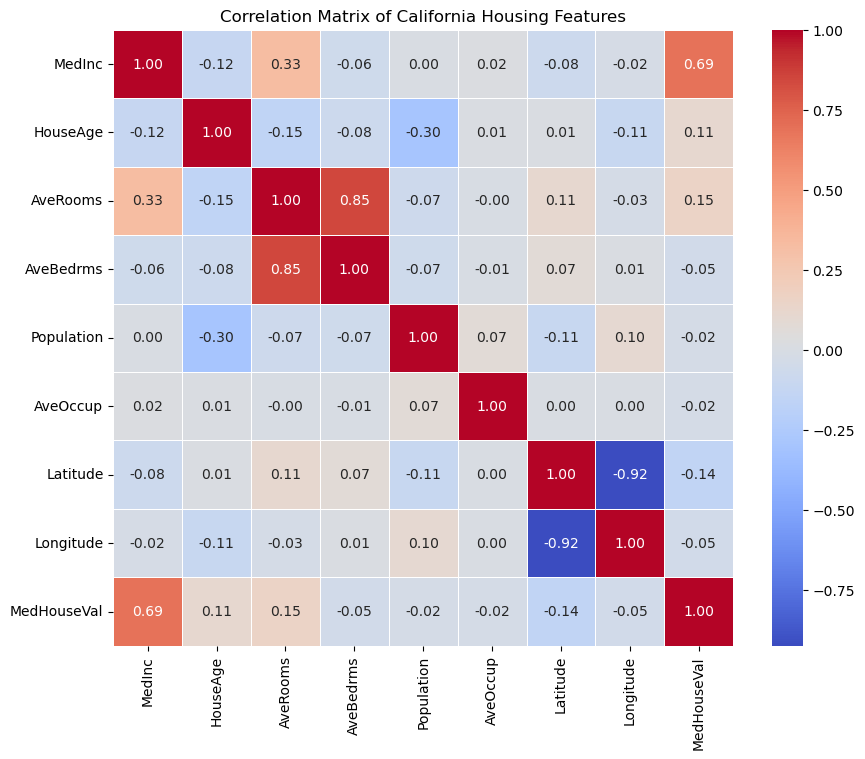

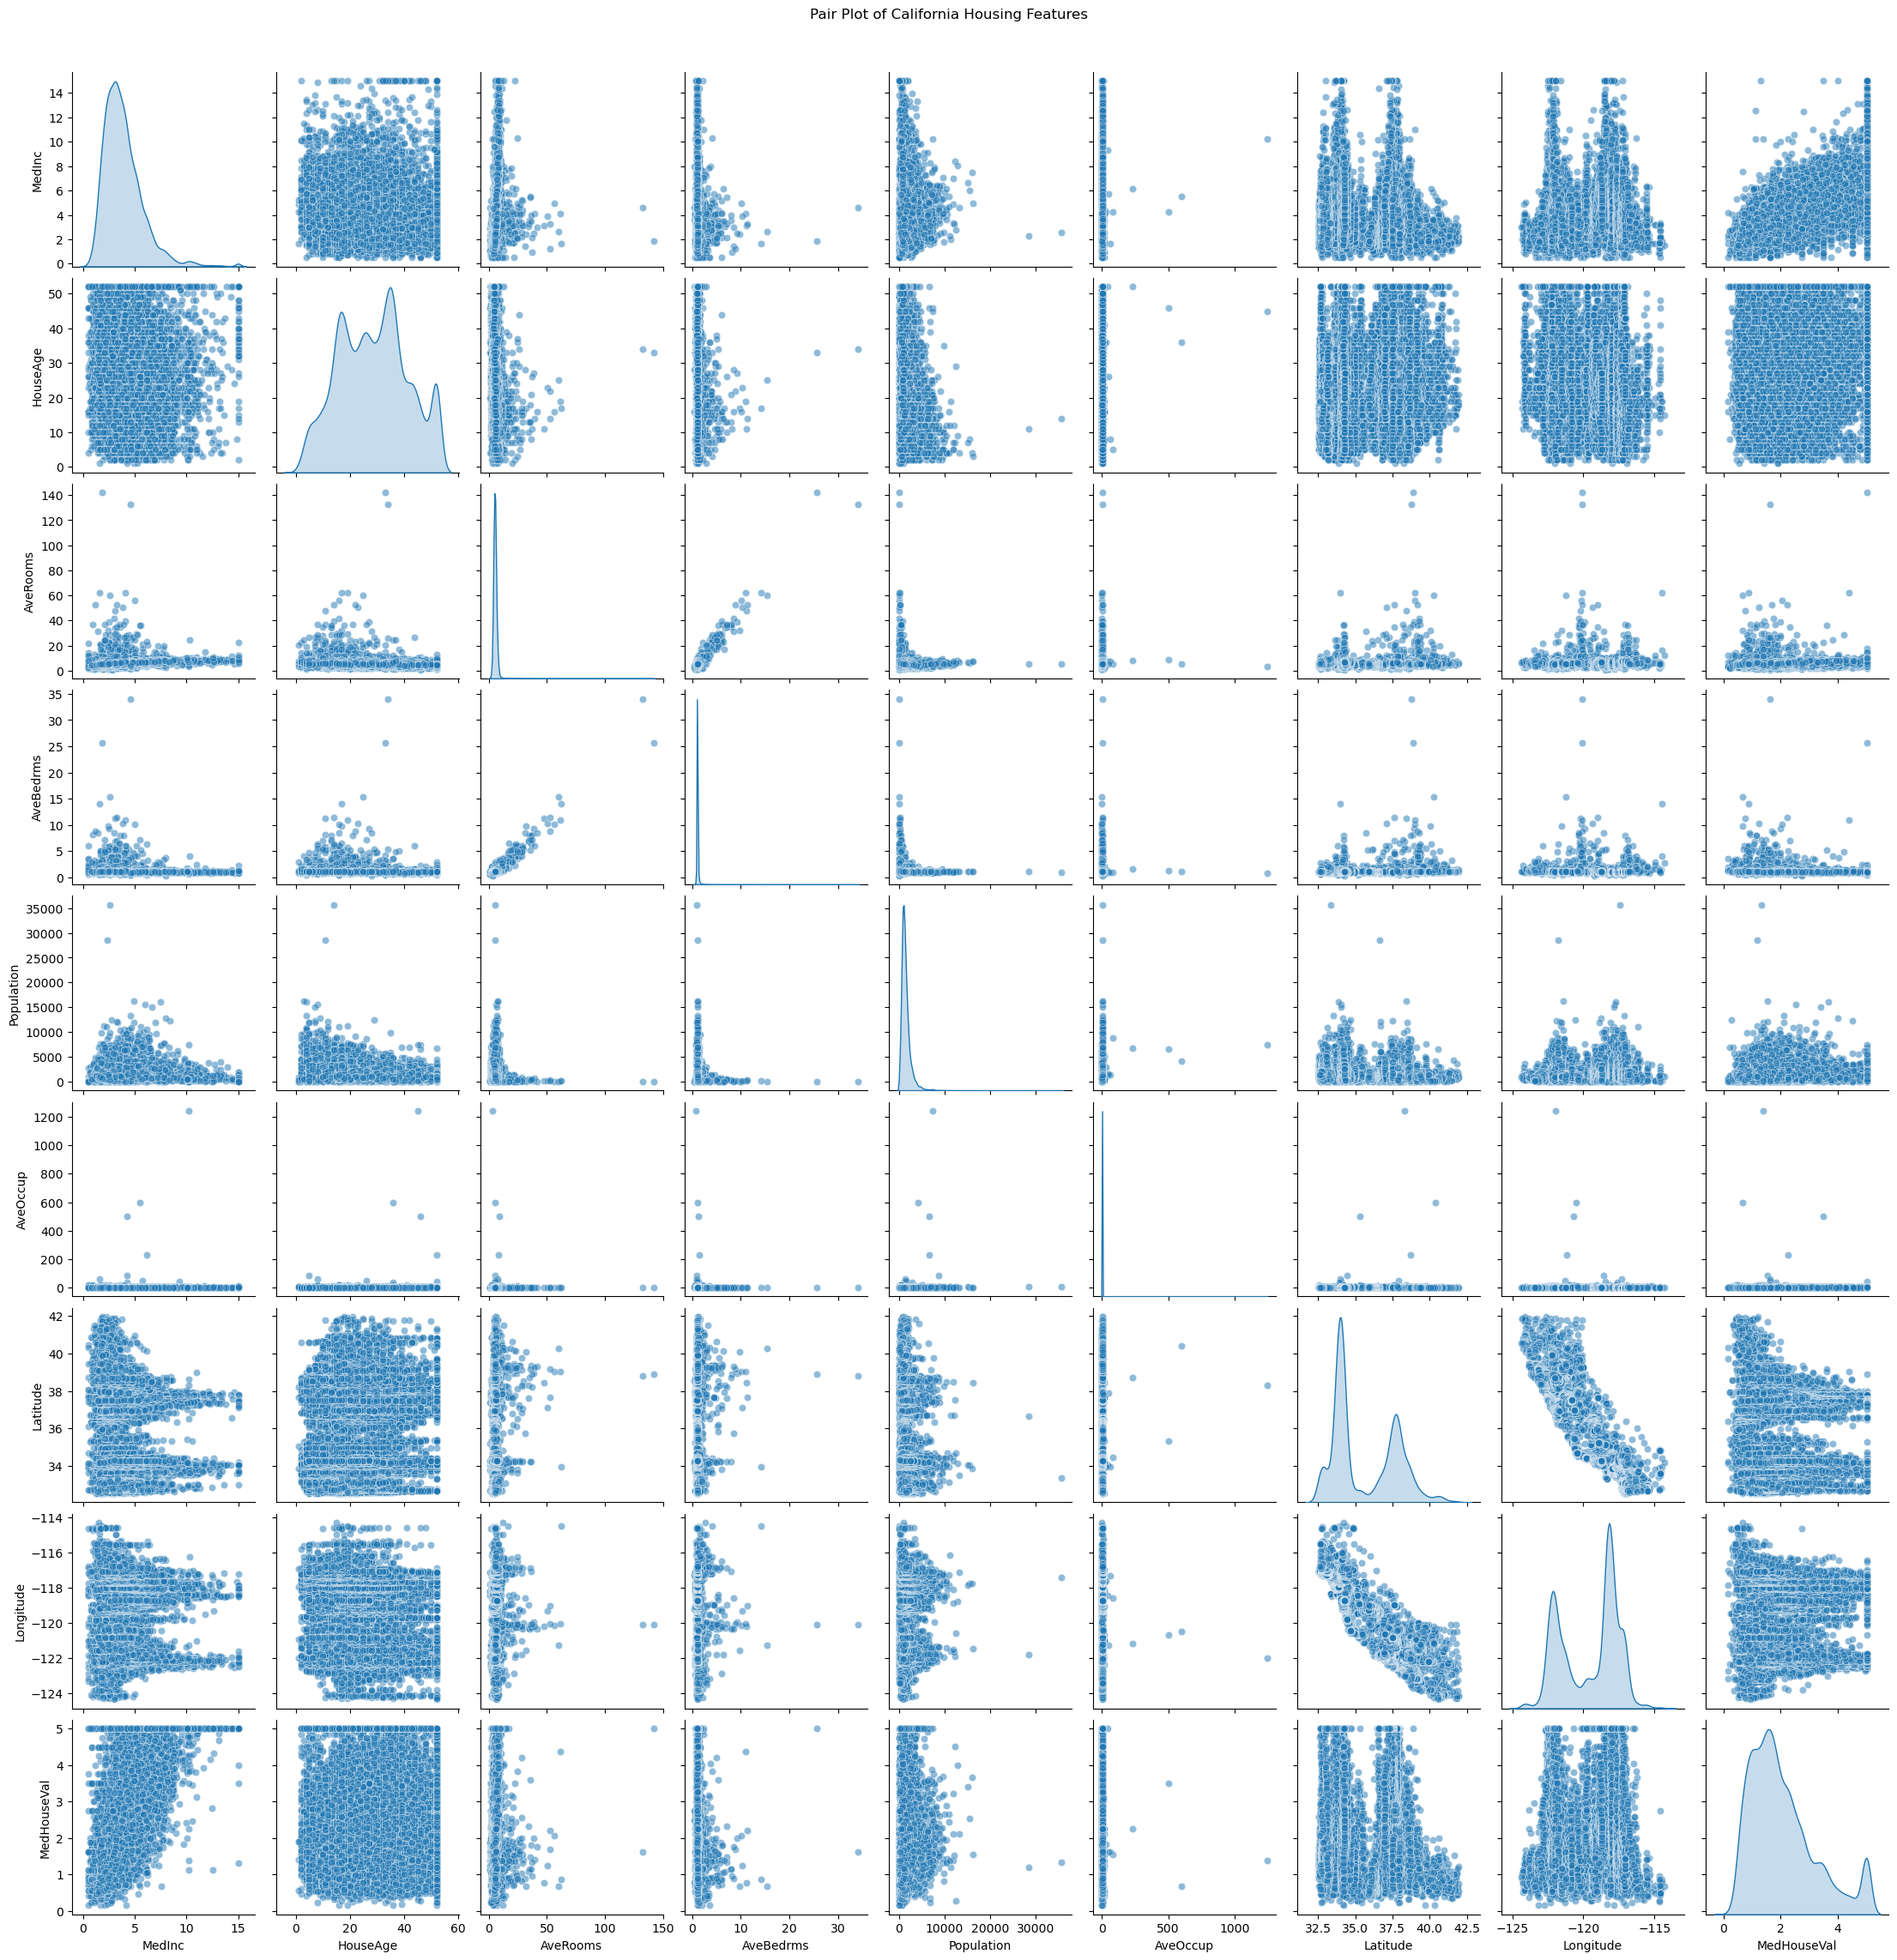

In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
# Step 1: Load the California Housing Dataset
california_data = fetch_california_housing(as_frame=True)
data = california_data.frame
# Step 2: Compute the correlation matrix
correlation_matrix = data.corr()
# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
linewidths=0.5)
plt.title('Correlation Matrix of California Housing Features')
plt.show()
# Step 4: Create a pair plot to visualize pairwise relationships
sns.pairplot(data, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pair Plot of California Housing Features', y=1.02)
plt.show()

# Prg 3

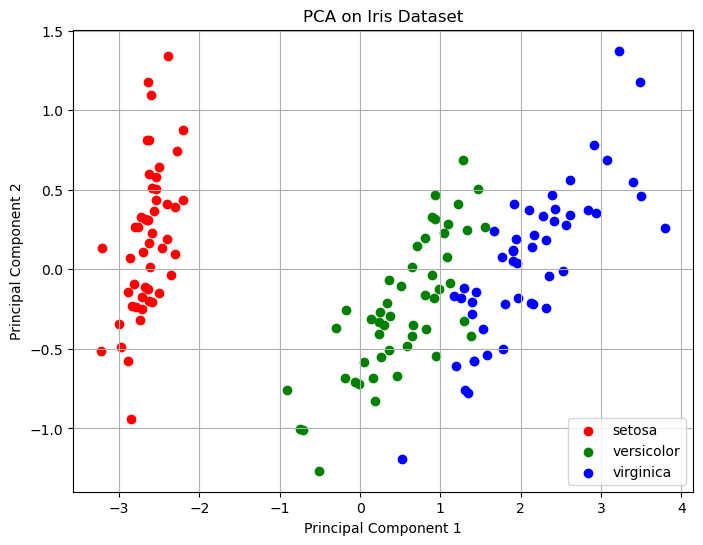

In [115]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Load the Iris dataset
iris = load_iris()
data = iris.data
labels = iris.target
label_names = iris.target_names
# Convert to a DataFrame for better visualization
iris_df = pd.DataFrame(data, columns=iris.feature_names)
# Perform PCA to reduce dimensionality to 2
pca = PCA(n_components=2)
data_reduced = pca.fit_transform(data)
# Create a DataFrame for the reduced data
reduced_df = pd.DataFrame(data_reduced, columns=['Principal Component 1',
'Principal Component 2'])
reduced_df['Label'] = labels
# Plot the reduced data
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i, label in enumerate(np.unique(labels)):
    plt.scatter(
    reduced_df[reduced_df['Label'] == label]['Principal Component 1'],
    reduced_df[reduced_df['Label'] == label]['Principal Component 2'],
    label=label_names[label],
    color=colors[i]
    )
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

# Prg 4

In [116]:
import pandas as pd
def find_s_algorithm(file_path):
    data = pd.read_csv(file_path)
    print("Training data:")
    print(data)
    attributes = data.columns[:-1]
    class_label = data.columns[-1]
    hypothesis = ['?' for _ in attributes]
    for index, row in data.iterrows():
        if row[class_label] == 'Yes':
            for i, value in enumerate(row[attributes]):
                if hypothesis[i] == '?' or hypothesis[i] == value:
                    hypothesis[i] = value
                else:
                    hypothesis[i] = '?'
    return hypothesis
file_path = r'./training_data.csv'
hypothesis = find_s_algorithm(file_path)
print("\nThe final hypothesis is:", hypothesis)

Training data:
    Outlook Temperature Humidity  Windy PlayTennis
0     Sunny         Hot     High  False         No
1     Sunny         Hot     High   True         No
2  Overcast         Hot     High  False        Yes
3      Rain        Cold     High  False        Yes
4      Rain        Cold     High   True         No
5  Overcast         Hot     High   True        Yes
6     Sunny         Hot     High  False         No

The final hypothesis is: ['Overcast', 'Hot', 'High', '?']


# Prg 5

Results for k=1: ['Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class1'
 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class1' 'Class1' 'Class2'
 'Class1' 'Class2' 'Class1' 'Class2' 'Class2' 'Class1' 'Class1' 'Class2'
 'Class2' 'Class2' 'Class2' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2'
 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2' 'Class1'
 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class2' 'Class1'
 'Class1' 'Class1']
Results for k=2: ['Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class1'
 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class1' 'Class1' 'Class2'
 'Class1' 'Class2' 'Class1' 'Class2' 'Class2' 'Class1' 'Class1' 'Class2'
 'Class2' 'Class2' 'Class2' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2'
 'Class1' 'Class1' 'Class1' 'Class1' 'Class2' 'Class2' 'Class2' 'Class1'
 'Class1' 'Class2' 'Class2' 'Class2' 'Class2' 'Class1' 'Class2' 'Class1'
 'Class1' 'Class1']
Results for k=3: ['Class2' 'Class2' 'Class2' 'Clas

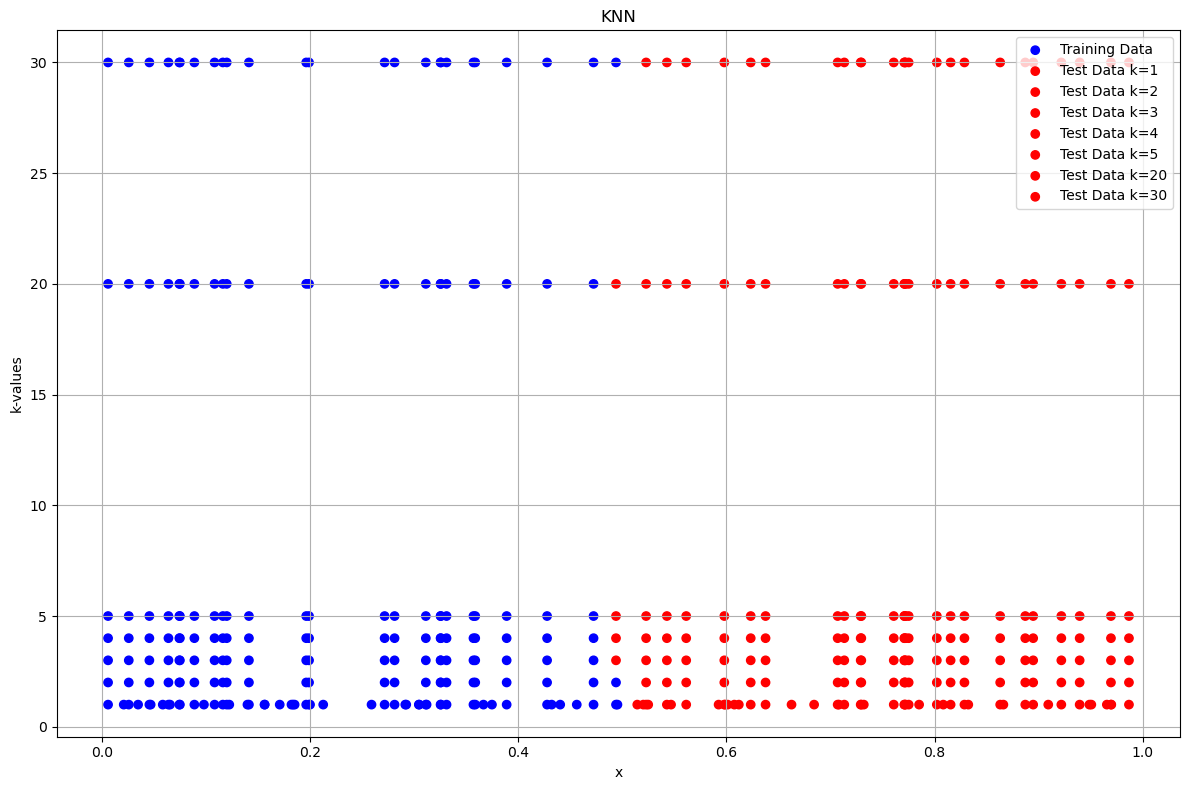

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
def generate_data():
    np.random.seed(42) # For reproducibility
    x = np.random.rand(100) # Generate 100 random values in [0,1]
    labels = np.array(["Class1" if xi <= 0.5 else "Class2" for xi in x[:50]]) #
    # Label first 50 points
    return x, labels

def knn_classification(train_x, train_labels, test_x, k):
    predictions = []
    for x_test in test_x:
        distances = np.abs(train_x - x_test) # Compute absolute distance
        nearest_indices = np.argsort(distances)[:k] # Get k nearest neighbors
        nearest_labels = train_labels[nearest_indices] # Get corresponding labels
        most_common = Counter(nearest_labels).most_common(1)[0][0] #
        # Majority voting
        predictions.append(most_common)
    return np.array(predictions)

def main():
    x, labels = generate_data()
    train_x, test_x = x[:50], x[50:]
    train_labels = labels
    k_values = [1, 2, 3, 4, 5, 20, 30]
    results = {}
    plt.figure(figsize=(12,8))
    plt.title('KNN')
    for k in k_values:
        predictions = knn_classification(train_x, train_labels, test_x, k)
        results[k] = predictions
    for k, preds in results.items():
        print(f"Results for k={k}: {preds}")
    plt.scatter(train_x, [1] * 50, c=["blue" if lbl == "Class1" else "red" for lbl in train_labels], label="Training Data")
    for k, preds in results.items():
        plt.scatter(test_x, [k] * 50, c=["blue" if lbl == "Class1" else "red" for lbl in preds], label=f"Test Data k={k}")
    plt.xlabel("x")
    plt.ylabel("k-values")
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()

# Prg 6

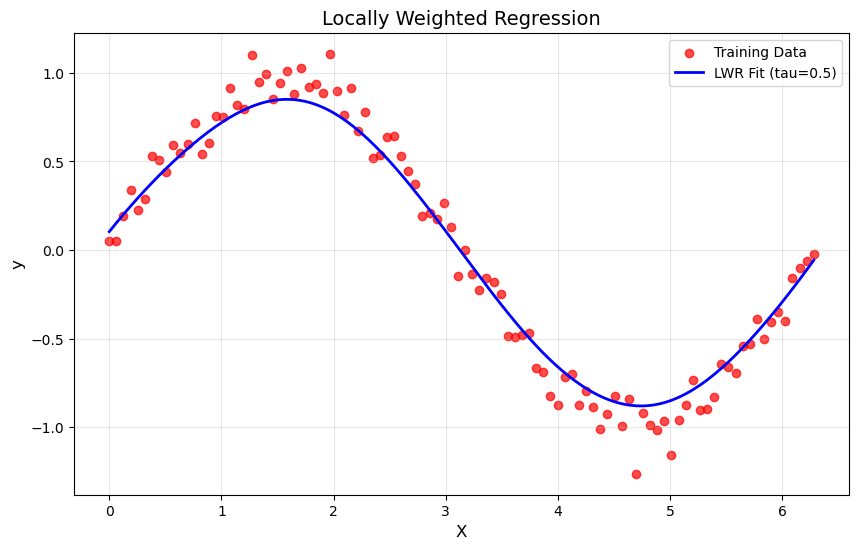

In [118]:
import numpy as np
import matplotlib.pyplot as plt
def gaussian_kernel(x, xi, tau):
    return np.exp(-np.sum((x - xi) ** 2) / (2 * tau ** 2))
def locally_weighted_regression(x, X, y, tau):
    m = X.shape[0]
    weights = np.array([gaussian_kernel(x, X[i], tau) for i in range(m)])
    W = np.diag(weights)
    X_transpose_W = X.T @ W
    theta = np.linalg.inv(X_transpose_W @ X) @ X_transpose_W @ y
    return x @ theta
np.random.seed(42)
X = np.linspace(0, 2 * np.pi, 100)
y = np.sin(X) + 0.1 * np.random.randn(100)
X_bias = np.c_[np.ones(X.shape), X]
x_test = np.linspace(0, 2 * np.pi, 200)
x_test_bias = np.c_[np.ones(x_test.shape), x_test]
tau = 0.5
y_pred = np.array([locally_weighted_regression(xi, X_bias, y, tau) for xi in
x_test_bias])
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', label='Training Data', alpha=0.7)
plt.plot(x_test, y_pred, color='blue', label=f'LWR Fit (tau={tau})', linewidth=2)
plt.xlabel('X', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Locally Weighted Regression', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# Prg 7

Demonstrating Linear Regression and Polynomial Regression



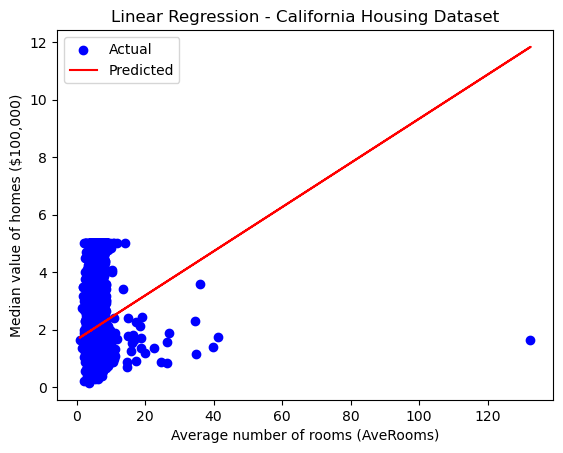

Linear Regression - California Housing Dataset
Mean Squared Error: 1.2923314440807299
R^2 Score: 0.013795337532284901


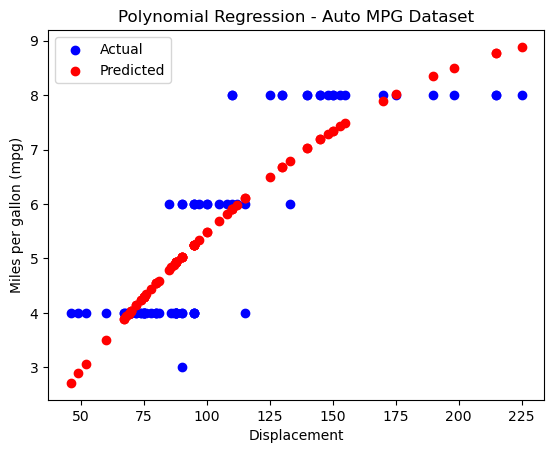

Polynomial Regression - Auto MPG Dataset
Mean Squared Error: 0.7431490557205862
R^2 Score: 0.7505650609469626


In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
def linear_regression_california():
    housing = fetch_california_housing(as_frame=True)
    X = housing.data[["AveRooms"]]
    y = housing.target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
    random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.plot(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("Average number of rooms (AveRooms)")
    plt.ylabel("Median value of homes ($100,000)")
    plt.title("Linear Regression - California Housing Dataset")
    plt.legend()
    plt.show()
    print("Linear Regression - California Housing Dataset")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))
def polynomial_regression_auto_mpg():
    url = r"./auto-mpg.data"
    column_names = ["mpg", "cylinders", "displacement", "horsepower",
    "weight", "acceleration", "model_year", "origin"]
    data = pd.read_csv(url, sep=r'\s+', names=column_names, na_values="?")
    data = data.dropna()
    X = data["displacement"].values.reshape(-1, 1)
    y = data["mpg"].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
    random_state=42)
    poly_model = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())
    poly_model.fit(X_train, y_train)
    y_pred = poly_model.predict(X_test)
    plt.scatter(X_test, y_test, color="blue", label="Actual")
    plt.scatter(X_test, y_pred, color="red", label="Predicted")
    plt.xlabel("Displacement")
    plt.ylabel("Miles per gallon (mpg)")
    plt.title("Polynomial Regression - Auto MPG Dataset")
    plt.legend()
    plt.show()
    print("Polynomial Regression - Auto MPG Dataset")
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))
if __name__ == "__main__":
    print("Demonstrating Linear Regression and Polynomial Regression\n")
    linear_regression_california()
    polynomial_regression_auto_mpg()

# Prg 8

Model Accuracy: 94.74%
Predicted Class for the new sample: Benign


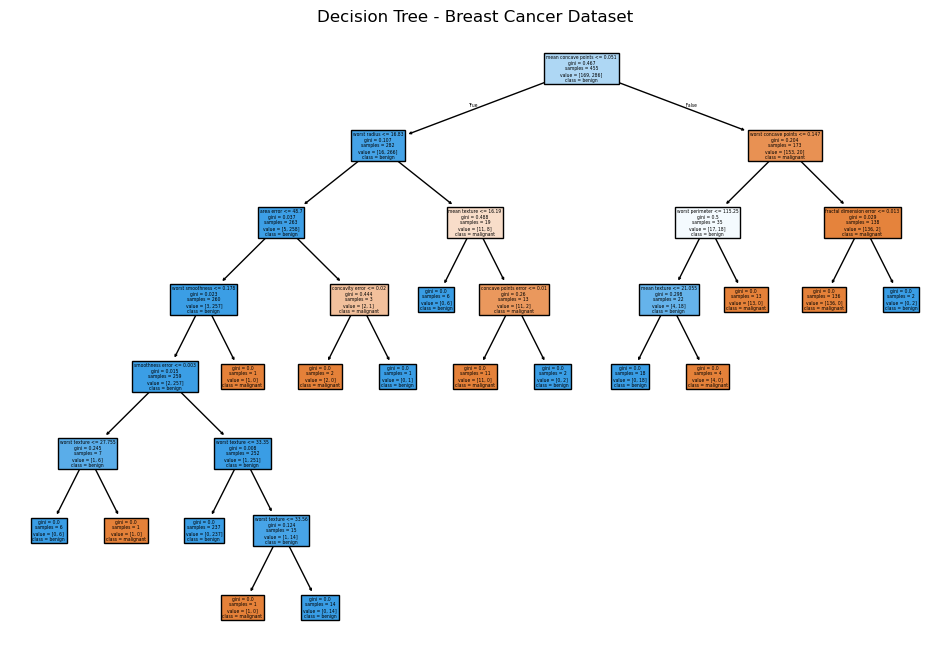

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
new_sample = np.array([X_test[0]])
prediction = clf.predict(new_sample)
prediction_class = "Benign" if prediction == 1 else "Malignant"
print(f"Predicted Class for the new sample: {prediction_class}")
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=data.feature_names,
class_names=data.target_names)
plt.title("Decision Tree - Breast Cancer Dataset")
plt.show()

# Prg 9

Naive Bayes Classifier Accuracy: 77.50%


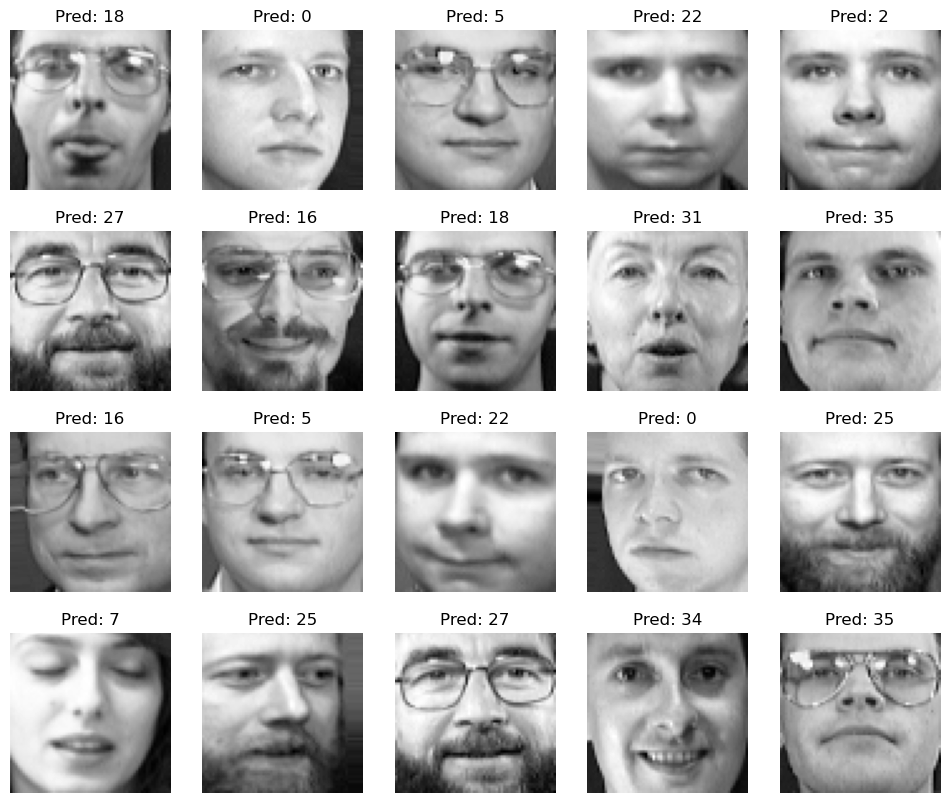

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Load the Olivetti Faces dataset
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X, y = data.images, data.target
# Flatten the images for the classifier
X = X.reshape((X.shape[0], -1))
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Train the Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)
# Predict the labels for test data
y_pred = classifier.predict(X_test)
# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Classifier Accuracy: {accuracy * 100:.2f}%")
# Display more test images with predicted labels
fig, axes = plt.subplots(4, 5, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(64, 64), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}")
    ax.axis('off')
plt.show()

# Prg 10

Confusion Matrix:
[[175  37]
 [ 13 344]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       212
           1       0.90      0.96      0.93       357

    accuracy                           0.91       569
   macro avg       0.92      0.89      0.90       569
weighted avg       0.91      0.91      0.91       569



D:\Softwares\Conda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


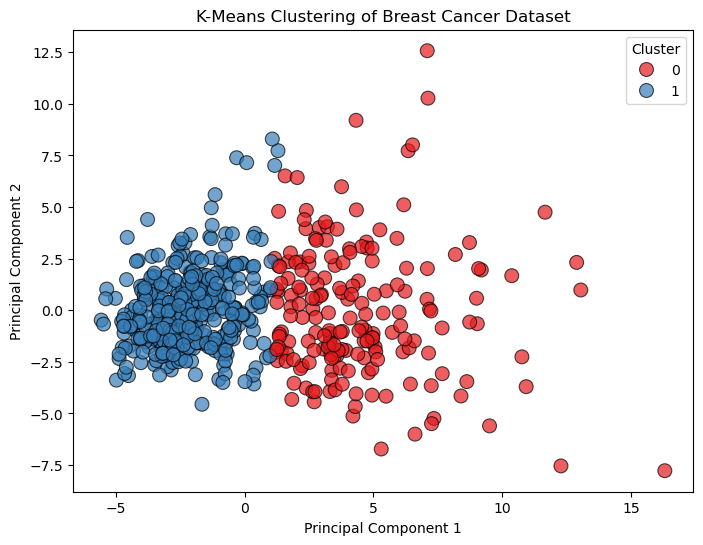

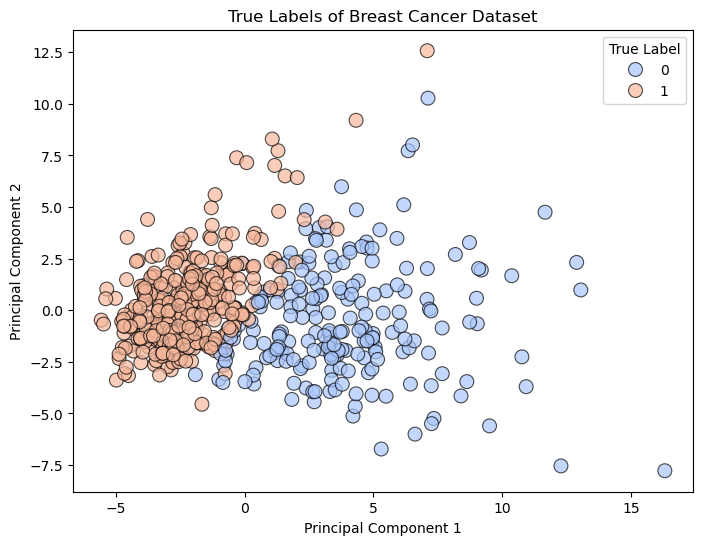

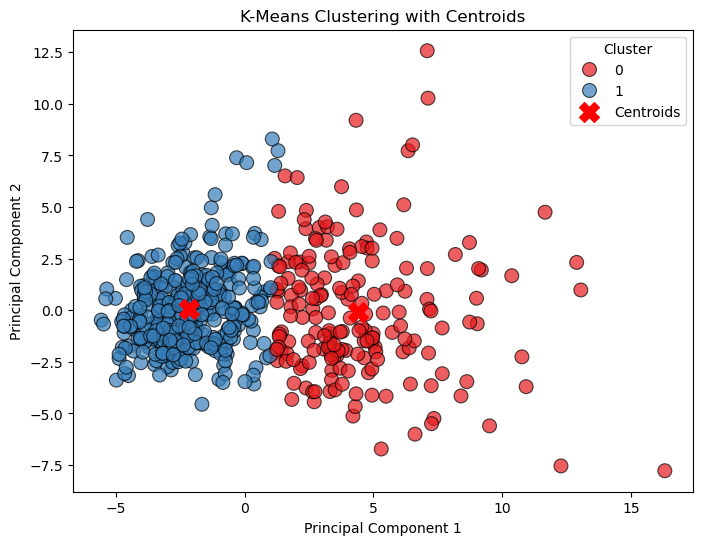

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report
data = load_breast_cancer()
X = data.data
y = data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y, y_kmeans))
print("\nClassification Report:")
print(classification_report(y, y_kmeans))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df['Cluster'] = y_kmeans
df['True Label'] = y
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100,
edgecolor='black', alpha=0.7)
plt.title('K-Means Clustering of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='True Label', palette='coolwarm',
s=100, edgecolor='black', alpha=0.7)
plt.title('True Labels of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="True Label")
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100,
edgecolor='black', alpha=0.7)
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='red', marker='X',
label='Centroids')
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title="Cluster")
plt.show()